<font color = darkblue size =5><center> PROBLEM STATEMENT

<font color = GREEN size =3.5> <center>Prediction of abnormal blood pressure.

<font color = darkblue size =5><center> OBJECTIVE

<font color = GREEN size =3.5>Employing statistical techniques, conduct a preliminary prognosis of Hypertenstion / Hypotension, based on the level of hemoglobin and genetic history of the individual. 

<font color = darkblue size =5><center> LOADING LIBRARIES

In [56]:
import time
start_time = time.time()

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import warnings

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<font color = darkblue size =5><center> DATA LOADING/DATA GATHERING

In [58]:
## Training Data
df = pd.read_csv(r"C:\Users\HP\Abnormal Blood Pressure Classification\BPA_DATA_2 features.csv")
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient
0,1,1,11.28,0.90
1,2,0,9.75,0.23
2,3,1,10.79,0.91
3,4,0,11.00,0.43
4,5,1,14.17,0.83


In [59]:
df.drop("Patient_Number", axis=1, inplace=True)

In [60]:
## Getting basic statistical detail of columns
df.describe()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient
count,2000.000000,2000.000000,1908.000000
mean,0.493500,11.710035,0.494817
std,0.500083,2.186701,0.291736
min,0.000000,8.100000,0.000000
25%,0.000000,10.147500,0.240000
50%,0.000000,11.330000,0.490000
75%,1.000000,12.945000,0.740000
max,1.000000,17.560000,1.000000


In [61]:
## checking for the classes distribution in target column
df['Blood_Pressure_Abnormality'].value_counts() 

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

<AxesSubplot:ylabel='Blood_Pressure_Abnormality'>

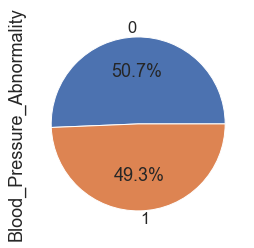

In [62]:
df['Blood_Pressure_Abnormality'].value_counts().plot(kind='pie',autopct = '%1.1f%%') 
#no imbalance in data 0 = 50.6%, 1 = 49.4%

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Blood_Pressure_Abnormality    2000 non-null   int64  
 1   Level_of_Hemoglobin           2000 non-null   float64
 2   Genetic_Pedigree_Coefficient  1908 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


<font color = darkblue size =5><center> CHEKING NULL PERCENTAGE

In [64]:
## Function for checking percentage of null values in dataframe columns

def null_value_check_in_dataframe(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

df_null = null_value_check_in_dataframe(df)
df_null

,column_name,percent_missing
Blood_Pressure_Abnormality,Blood_Pressure_Abnormality,0.0
Level_of_Hemoglobin,Level_of_Hemoglobin,0.0
Genetic_Pedigree_Coefficient,Genetic_Pedigree_Coefficient,4.6


<font color = darkblue size =5><center> SPLITTING DATA INTO TRAIN AND TEST DATASET

In [65]:
## Train-Test data split (10% Test data)

train,test = train_test_split(df, train_size=0.9 ,test_size = 0.1, random_state=50, stratify=df['Blood_Pressure_Abnormality'])

<font color = darkblue size =5><center> EXPLORATORY DATA ANALYSIS

<font color = darkblue size =5> 1. PEARSON CORRELATION 

<AxesSubplot:>

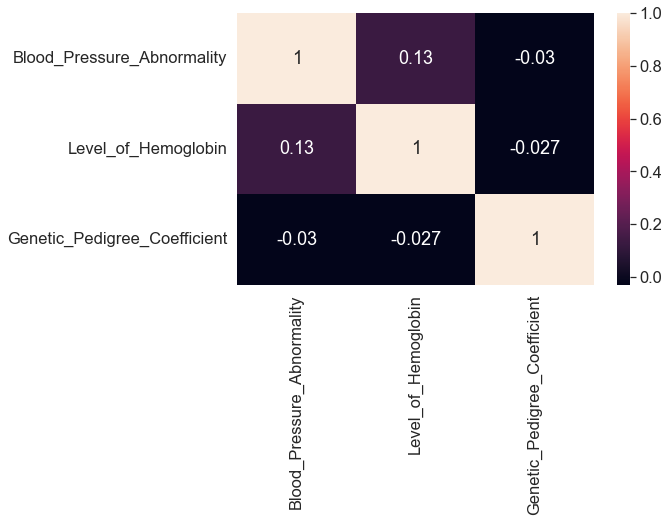

In [66]:
# calculate the correlation matrix

plt.figure(figsize=(8,5))
sns.heatmap(train.corr(), annot = True)

<font color = darkblue size =5> 2. HISTOGRAM

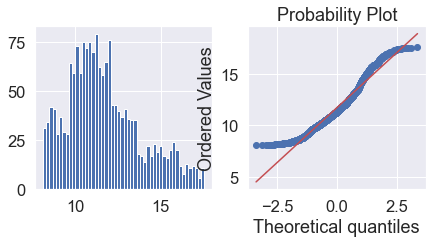

In [67]:
import scipy.stats as stat
import pylab

def plot_data(train,features):
  plt.figure(figsize=(7,3))
  plt.subplot(1,2,1)
  train[features].hist(bins=50)
  plt.subplot(1,2,2)
  stat.probplot(train[features],dist='norm',plot=pylab)
  plt.show()
plot_data(train,'Level_of_Hemoglobin')

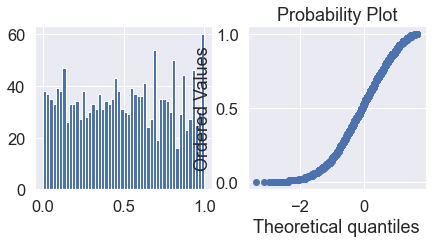

In [68]:
plot_data(train,'Genetic_Pedigree_Coefficient')

<font color = darkblue size =5> 4. BOXPLOTS (For checking Range of Values and Outliers)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Level_of_Hemoglobin'>

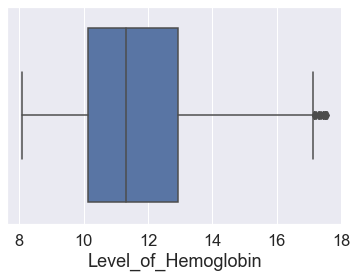

In [69]:
## Boxplot for checking the variance and outliers in data
sns.boxplot(df["Level_of_Hemoglobin"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genetic_Pedigree_Coefficient'>

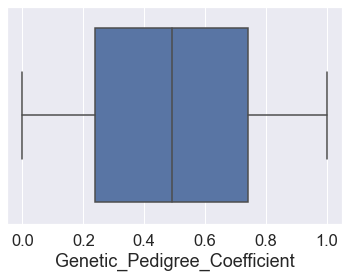

In [70]:
sns.boxplot(df["Genetic_Pedigree_Coefficient"])

<font color = darkblue size =5> 5. PAIR PLOT (Scatter Matrix Plot)

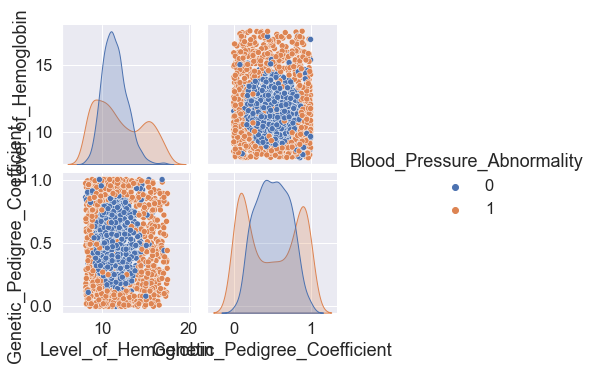

In [71]:
## Checking for the relationship between numerical variables through scatter plot

sns.pairplot(df, hue = 'Blood_Pressure_Abnormality')

<font color = darkblue size =5><center> MISSING VALUE IMPUTATION 

In [72]:
## Fuction for Missing value imputation using IterativeImputer

def missing_value_imputation(df):
    
    ## Creating copy of a dataframe
    df_imputed = df.copy()

    df_imputed["Genetic_Pedigree_Coefficient"] = df_imputed["Genetic_Pedigree_Coefficient"].fillna(df_imputed["Genetic_Pedigree_Coefficient"].median())
    
    return df_imputed

<font color = darkblue size =5><center>  SCALING

In [73]:
## Function for normalizing data using MinMaxScaler

def data_normalization(df):
    
    # Normalization - MinMaxScaler Transform
    cols_to_transform = ['Level_of_Hemoglobin']
    df_to_transform = df[cols_to_transform]

    trans = MinMaxScaler()
    scaled_features = trans.fit_transform(df_to_transform)

    # convert the array back to a dataframe
    df_transformed = pd.DataFrame(scaled_features, index=df_to_transform.index, columns=df_to_transform.columns)

    df_subset = df.drop(cols_to_transform, axis=1)
    df_train_transformed = pd.concat([df_transformed,df_subset], axis=1)
    
    return df_train_transformed

In [74]:
## Function for data preparation (which does data cleaning, normalization and column encoding)

def data_preparation(df):
    
    df_missing_value_imputation = missing_value_imputation(df)
    df_data_normalized = data_normalization(df_missing_value_imputation)

    return df_data_normalized
df=data_preparation(df)

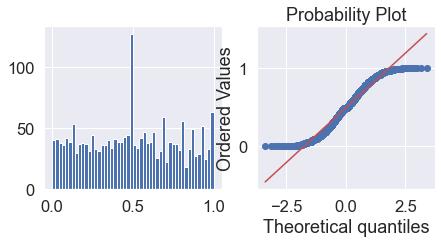

In [75]:
plot_data(df,'Genetic_Pedigree_Coefficient')

<font color = darkblue size =5><center> TRAIN AND TEST DATA PREPERATION 

In [76]:
## Data Preparation for Training dataframe
df_train_cleaned = data_preparation(train)

## Data Preparation for Test dataframe
df_test_cleaned = data_preparation(test)

<font color = darkblue size =5><center> SEPERATING OUT TARGET AND DEPENDENT VARIABLE

In [77]:
df_train_cleaned.shape

(1800, 3)

In [78]:
# Putting feature variable to X_train and X_test
X_train = df_train_cleaned.drop(['Blood_Pressure_Abnormality'], axis=1)
X_test = df_test_cleaned.drop(['Blood_Pressure_Abnormality'], axis=1)

# Putting response variable to y_train and y_test
y_train = df_train_cleaned['Blood_Pressure_Abnormality']
y_test = df_test_cleaned['Blood_Pressure_Abnormality']

<font color = darkblue size =5><center> BULDING RANDOM FOREST MODEL

In [79]:
# Creating a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

# Training the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# predicting probabilities
rf_probs = clf.predict_proba(X_test)

# keeping probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predicting labels
y_pred=clf.predict(X_test)

<font color = darkblue size =5><center> EVALUATION METRIX

In [80]:
# Calculating different metrics to check the model performance on Test data

In [81]:
## Calculating different model metrics
y_pred_train = clf.predict(X_train)

print("Train_Accuracy  :: %.3f"% accuracy_score(y_train, y_pred_train))
print("Accuracy  :: %.3f"% accuracy_score(y_test, y_pred))
print("Recall    :: %.3f"% recall_score(y_test, y_pred))
print("Precision :: %.3f"% precision_score(y_test, y_pred))
print("F1 Score  :: %.3f"% f1_score(y_test, y_pred))
print("AUC Score :: %.3f"% roc_auc_score(y_test, rf_probs))

print("\nClassification Report ::")
print("\n",classification_report(y_test, y_pred))

Train_Accuracy  :: 0.999
Accuracy  :: 0.865
Recall    :: 0.798
Precision :: 0.919
F1 Score  :: 0.854
AUC Score :: 0.910

Classification Report ::

               precision    recall  f1-score   support

           0       0.82      0.93      0.87       101
           1       0.92      0.80      0.85        99

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



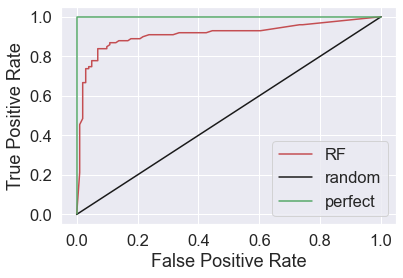

In [82]:
## Plotting ROC curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, rf_probs)

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

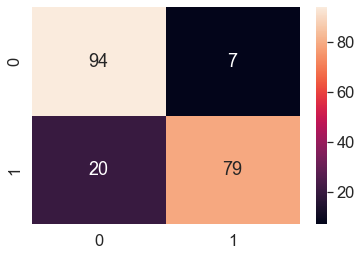

In [83]:
## Plotting confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.show()

Note : 
    Precision : Of all positive Predictions how may are really positive. 
    Recall: Of all real positive cases , how many are predicted positive.

<font color = darkblue size =5><center> FEATURE IMPORATANCE

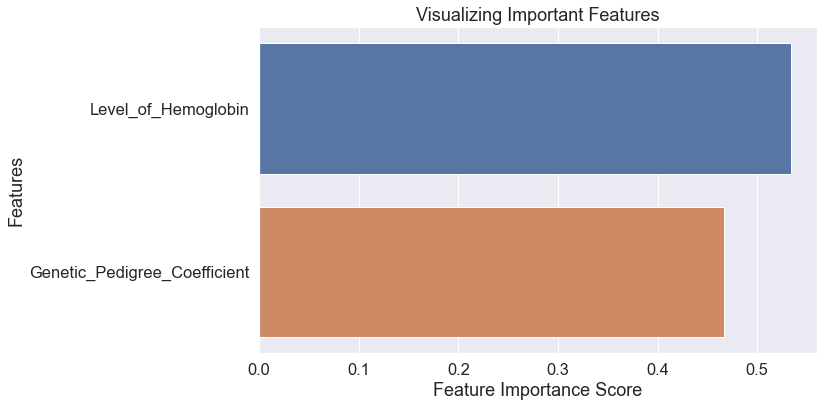

In [84]:
## Calculating Feature Importance
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot for Feature Importance
fig = plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

<font color = darkblue size =5><center> TESTING OUT MULTIPLE MODEL

The Idea here is to try out multiple classification models and choose the best one based on the evaluation metrics and Training/Testing time.

In [85]:
## Trying out different classification models and then we'll choose the best based on the different metrics saved

## Function for running different experiments or different models and caturing their respective metrices
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    # variable to hold all of the datasets that will be created from the application of k-fold cross validation on the training set
    dfs = []
    
    # list of tuples holding the name and class for each classifier to be tested
    models = [('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier(eval_metric='logloss'))
             ]

    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    for name, model in models:

      kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
      cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

      clf = model.fit(X_train, y_train)
      y_pred = clf.predict(X_test)

      print(name)
      print(classification_report(y_test, y_pred))

      results.append(cv_results)
      names.append(name)

      this_df = pd.DataFrame(cv_results)
      this_df['model'] = name
      dfs.append(this_df)
      final = pd.concat(dfs, ignore_index=True)

    return final

In [86]:
## Calling model experimentation function
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       101
           1       0.62      0.46      0.53        99

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.59      0.59       200

RF
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       101
           1       0.91      0.79      0.84        99

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

KNN
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       101
           1       0.95      0.81      0.87        99

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200

SVM
 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

XGB
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       101
           1       0.95      0.75      0.84        99

    accuracy                           0.85       200
   macro avg       0.87      0.85      0.85       200
weighted avg       0.87      0.85      0.85       200



In [87]:
## To obtain better estimates of the distribution of metrics from each model, ran empirical bootstrapping at 30 samples. 
## Additionally, partitioned the data into two sorts: performance metrics and fit-time metrics.

bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')

# fit time metrics
time_metrics = ['fit_time','score_time'] 

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

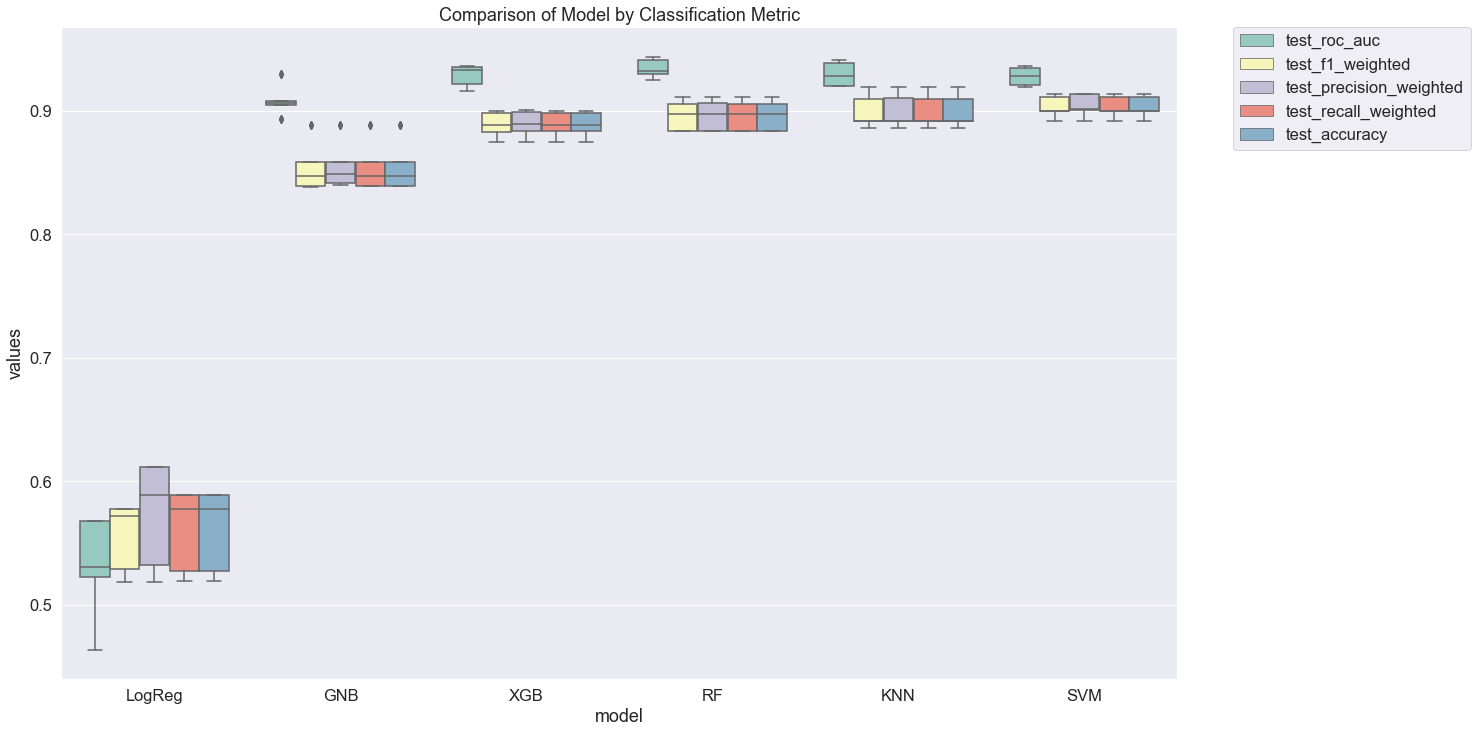

In [88]:
## Plotting performance metrics from the 5-fold cross validation.

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.show()

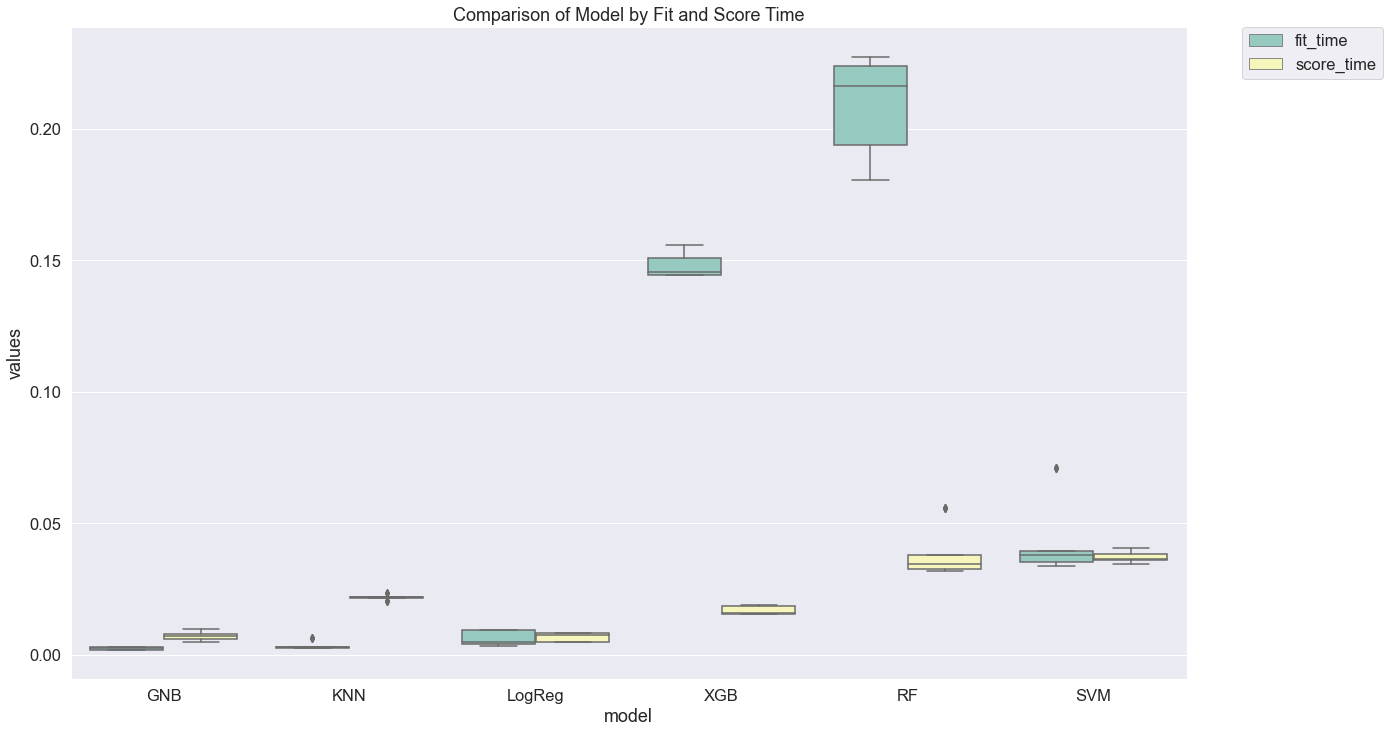

In [89]:
## Training and Scoring time comparison by plotting

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.show()

In [90]:
## Evaluation metrics details for all the trained models

metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_precision_weighted           test_f1_weighted            \
                           std      mean              std      mean   
model                                                                 
GNB                   0.016897  0.854512         0.017651  0.853333   
KNN                   0.012328  0.899621         0.012229  0.899450   
LogReg                0.035447  0.574244         0.025222  0.556073   
RF                    0.011220  0.895177         0.010948  0.894841   
SVM                   0.008539  0.904380         0.008466  0.903436   
XGB                   0.008550  0.890133         0.008251  0.889833   

       test_recall_weighted           test_accuracy           test_roc_auc  \
                        std      mean           std      mean          std   
model                                                                        
GNB                0.017680  0.853333      0.017680  0.853333     0.011028   
KNN                0.012215  0.899444      0.012215  0.899444     0.008802   
LogReg             0.027861  0.562500      0.027861  0.562500     0.035656   
RF                 0.010936  0.894815      0.010936  0.894815     0.007013   
SVM                0.008371  0.903426      0.008371  0.903426     0.006907   
XGB                0.008232  0.889815      0.008232  0.889815     0.006568   

                  
            mean  
model             
GNB     0.907944  
KNN     0.929911  
LogReg  0.531072  
RF      0.933375  
SVM     0.927646  
XGB     0.930229

In [91]:
## Training and prediction time calculation for all the trained models

time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

fit_time           score_time          
             std      mean        std      mean
model                                          
GNB     0.000434  0.002467   0.001692  0.007034
KNN     0.001429  0.003406   0.000797  0.021798
LogReg  0.002515  0.006110   0.001517  0.006913
RF      0.018971  0.208544   0.009683  0.038983
SVM     0.014829  0.044798   0.002065  0.037344
XGB     0.004650  0.147778   0.001531  0.017034

Based on the Evaluation Metrics (Accuracy, Precision Recall, F1-score etc.) SVM perform based on this dataset, where fit time is minimum but testing time is large than Random Forest(RF) but it is having slightly higher model training time (fit_time) compared to other models (except XGBoost, which is even having higher training time).

Either we can choose the Random Forest (as a best model) or go for second best model (in terms of prediction metrics and training time which is XGB(Extream Gradient Boosting.

So, this is basically an trade-of between the Accuracy(or other metrics for that matter) and the Training time, so we have to decide which one to choose if we have comparable model(slightly high/low prediction metrics and high/low mdel building/training time) because there is cost involve in that (Time + resources) and every business is having different context to look into this.

Once the model is finalized, then we'll go for the Hyperparameter tuning in oder to improve the model Accuracy further ( We'll have to decide based on the business objective whethere we really need this or not).

<font color = darkblue size =5><center> HYPERPARAMETER TUNING

<font color = darkblue size =5> 1. RANDOM FOREST

In [92]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
grid_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(grid_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [93]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_grid = RandomizedSearchCV(estimator = rf, param_distributions = grid_grid, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   verbose=2)

In [94]:
rf_grid.best_params_

{'n_estimators': 1155,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [95]:
# Creating a Random Forest Classifier
clf=RandomForestClassifier(n_estimators= 311,
 min_samples_split= 10,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 70,
 bootstrap= True)

# Training the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# predicting probabilities
rf_probs = clf.predict_proba(X_test)

# keeping probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predicting labels
y_pred=clf.predict(X_test)

In [96]:
## Calculating different model metrics
print("Accuracy  :: %.3f"% accuracy_score(y_test, y_pred))
print("Recall    :: %.3f"% recall_score(y_test, y_pred))
print("Precision :: %.3f"% precision_score(y_test, y_pred))
print("F1 Score  :: %.3f"% f1_score(y_test, y_pred))
print("AUC Score :: %.3f"% roc_auc_score(y_test, rf_probs))

print("\nClassification Report ::")
print("\n",classification_report(y_test, y_pred))

Accuracy  :: 0.895
Recall    :: 0.828
Precision :: 0.953
F1 Score  :: 0.886
AUC Score :: 0.898

Classification Report ::

               precision    recall  f1-score   support

           0       0.85      0.96      0.90       101
           1       0.95      0.83      0.89        99

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



<font color = darkblue size =5> 2. SVM

In [97]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
svc= SVC()
params = {'kernel': ['rbf'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000]}
rand_search = RandomizedSearchCV(svc, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(X_train, y_train)
rand_search.best_score_

0.9078054221702284

In [98]:
import xgboost 
xgb2_reg=xgboost.XGBRegressor(n_estimators= 899,
 mon_child_weight= 2,
 max_depth= 4,
 learning_rate= 0.05,
 booster= 'gbtree')
rand_search = RandomizedSearchCV(svc, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(X_train, y_train)
rand_search.best_score_

# <!-- test_model(xgb2_reg)

0.9066899732020186

### Accuracy of Model is 90%

<font color = darkblue size =5><center> TESTING MODEL ON UNSEEN DATA

In [99]:
X_test.iloc[3]

Level_of_Hemoglobin             0.546326
Genetic_Pedigree_Coefficient    0.200000
Name: 658, dtype: float64

In [100]:
rand_search.predict([X_test.iloc[3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [55]:
rand_search.predict([[0.54,0.20]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
end_time = time.time()
print('Time taken to execute a Model is :',end_time-start_time)